### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

Cargamos los archivos json y los concatenamos:

In [3]:
ny_hotels= pd.read_parquet('ny_hotels.parquet')

In [5]:
ny_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3779 non-null   float64       
 1   time            3779 non-null   datetime64[ns]
 2   rating          3779 non-null   int64         
 3   text            2224 non-null   object        
 4   business name   3779 non-null   object        
 5   address         3779 non-null   object        
 6   description     886 non-null    object        
 7   latitude        3779 non-null   float64       
 8   longitude       3779 non-null   float64       
 9   category        3779 non-null   object        
 10  avg_rating      3779 non-null   float64       
 11  num_of_reviews  3779 non-null   int64         
 12  price           3779 non-null   object        
 13  state           192 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
me

In [4]:
ny_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.118479e+20,2020-02-22 23:40:56.515,2,If you can't get anywhere else to go it's a go...,Capri Motel,"Capri Motel, 427 Broadway, Kingston, NY 12401",None,41.926901,-73.997192,Motel,2.4,8,No Price,None
1,1.031218e+20,2020-07-19 04:48:26.800,1,Just nasty,Capri Motel,"Capri Motel, 427 Broadway, Kingston, NY 12401",None,41.926901,-73.997192,Motel,2.4,8,No Price,None
2,1.089709e+20,2018-08-07 02:07:04.032,5,Clean rooms decent price,Capri Motel,"Capri Motel, 427 Broadway, Kingston, NY 12401",None,41.926901,-73.997192,Motel,2.4,8,No Price,None
3,1.144825e+20,2018-07-10 12:41:29.130,3,Great experience,Capri Motel,"Capri Motel, 427 Broadway, Kingston, NY 12401",None,41.926901,-73.997192,Motel,2.4,8,No Price,None
4,1.082605e+20,2019-04-05 21:44:15.219,1,None,Capri Motel,"Capri Motel, 427 Broadway, Kingston, NY 12401",None,41.926901,-73.997192,Motel,2.4,8,No Price,None


In [4]:
categories = ny_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Motel' 'Indoor lodging' 'Holiday accommodation service' 'Hotel'
 'Retreat center' 'Lodging' 'Health resort' 'Self-catering accommodation'
 'Serviced accommodation' 'Resort hotel' 'Lodge' 'Cabin rental agency'
 'Extended stay hotel' 'Hostel' 'Inn' 'Pet friendly accommodation'
 'Mountain cabin' 'Ski resort' 'Japanese inn' 'Yoga retreat center']


In [5]:
#top de los hoteles con mejores calificaciones
media_rating = ny_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Dining Room at The Otesaga Hotel    5.000000
Dream Catcher Estates               5.000000
Beaver Lake Estates                 5.000000
Camp Pinnacle                       5.000000
Harmony Hills                       5.000000
Morningside Camps & Cottages        4.950000
Kozy Acres                          4.944444
Pine Bay Farm Inc                   4.933333
Long Point Camp                     4.931818
Menla Retreat and Dewa Spa          4.931034
The Inn on Church                   4.923077
Boxingology, LLC.                   4.909091
Pet Express Wash                    4.900000
Eagle Bay Village Chalets           4.875000
Mount Saviour Monastery             4.875000
Name: rating, dtype: float64


### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [6]:
conteo_gmap_id = ny_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

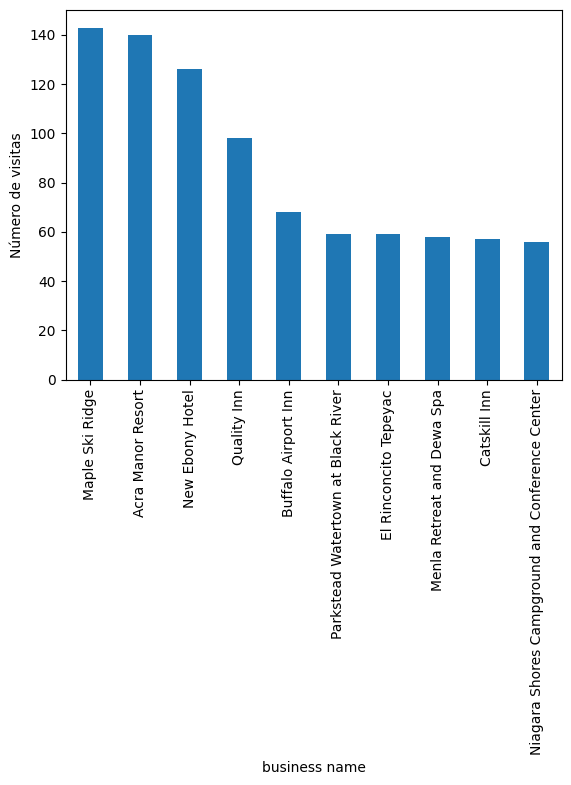

In [7]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

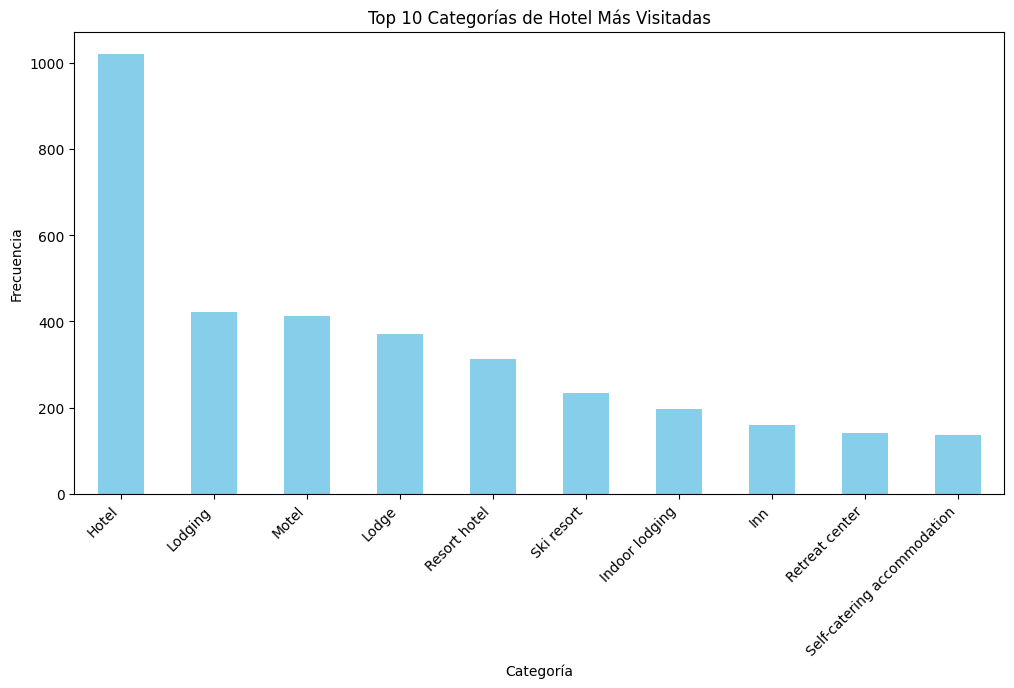

In [8]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = ny_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

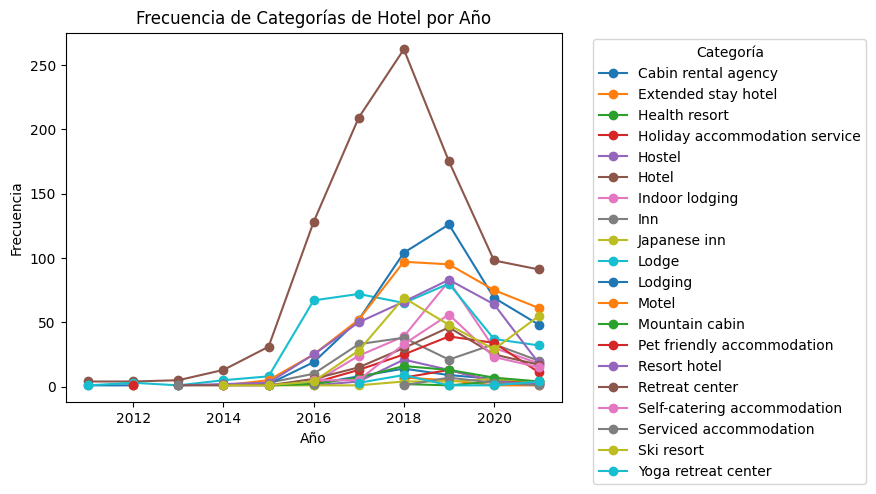

In [9]:

ny_hotels.loc[:, 'time'] = pd.to_datetime(ny_hotels['time'])

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = ny_hotels.groupby([ny_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

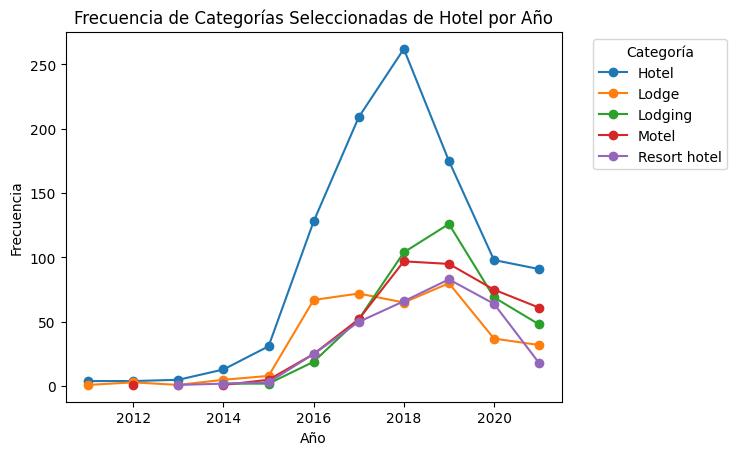

In [10]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = ny_hotels[ny_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.0 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

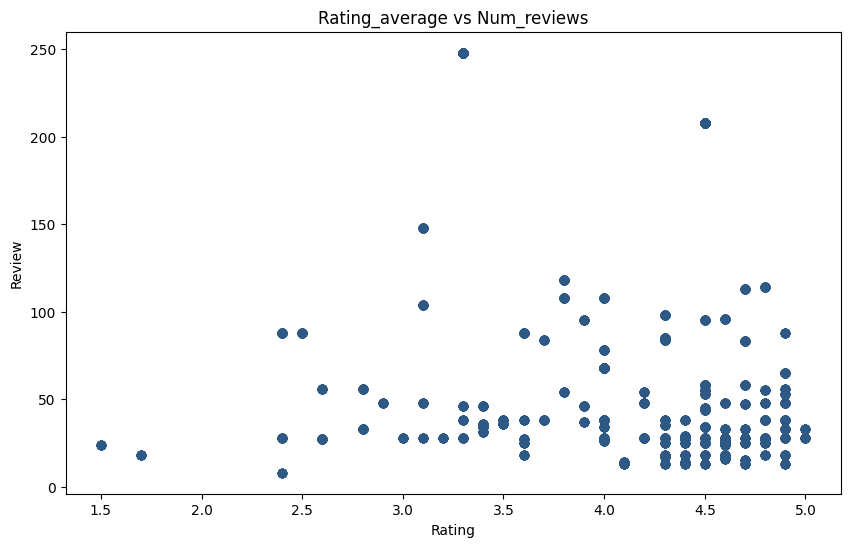

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(ny_hotels['avg_rating'], ny_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Número de negocios (categoria) de la muestra de google maps en el estado de Nueva York.

In [13]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = ny_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Hotel                            1020
Lodging                           422
Motel                             412
Lodge                             371
Resort hotel                      312
Ski resort                        235
Indoor lodging                    197
Inn                               159
Retreat center                    142
Self-catering accommodation       137
Pet friendly accommodation        126
Mountain cabin                     50
Cabin rental agency                45
Hostel                             45
Holiday accommodation service      27
Japanese inn                       21
Yoga retreat center                18
Serviced accommodation             15
Extended stay hotel                14
Health resort                      11
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

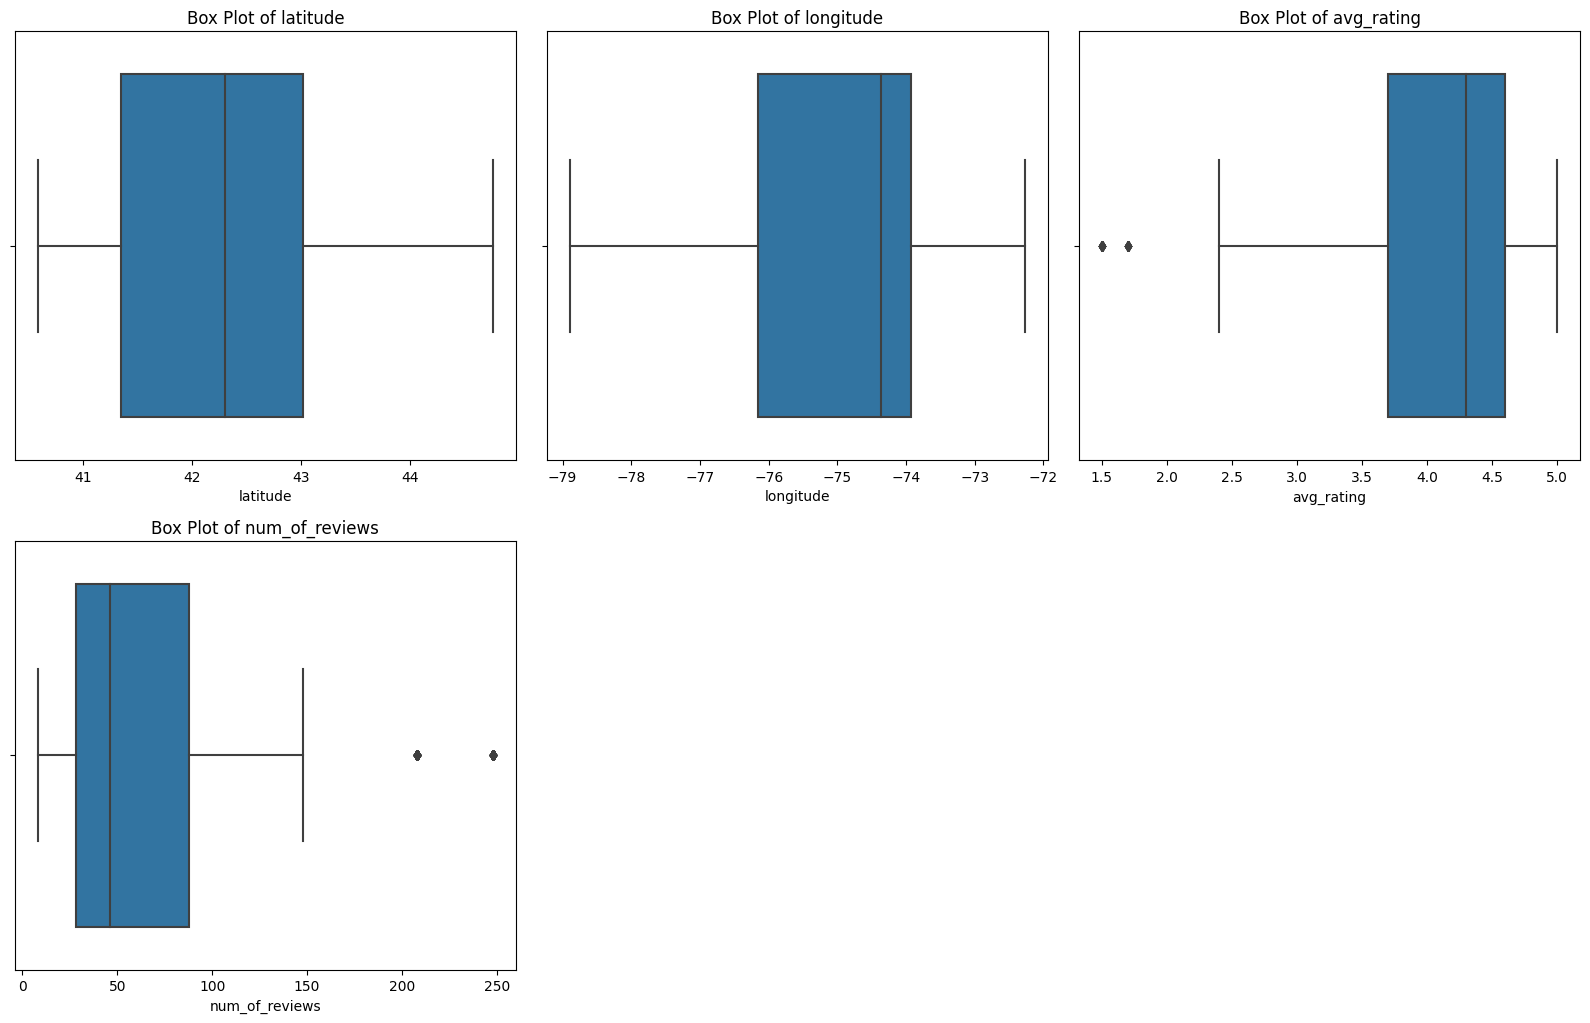

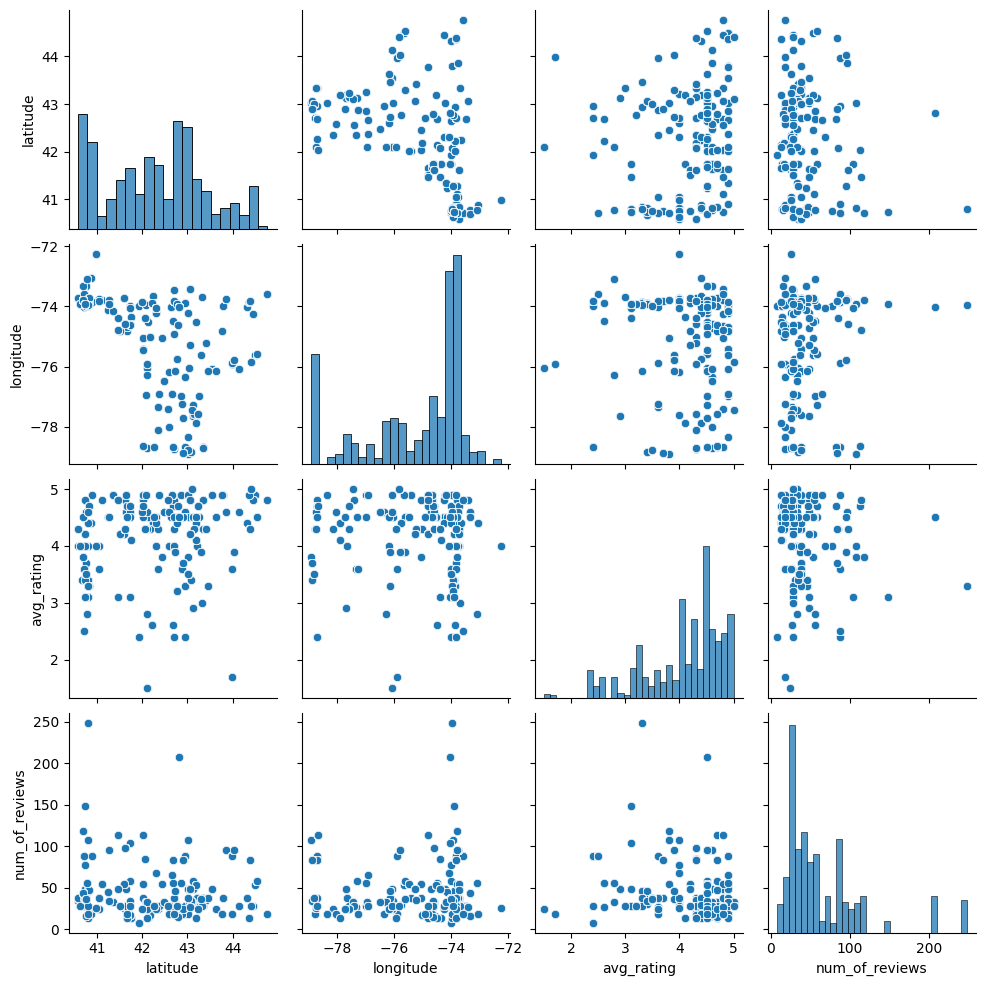

In [14]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=ny_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(ny_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

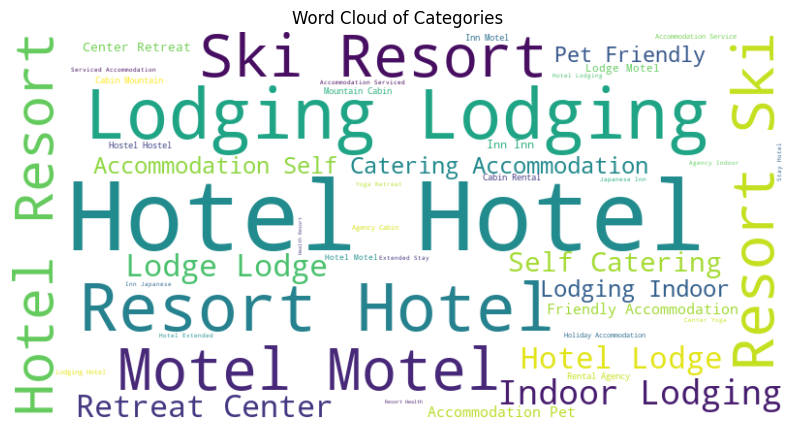

In [15]:
from wordcloud import WordCloud

ny_hotels.loc[:, 'category'] = ny_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(ny_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()